In [291]:
import pandas as pd
import json
import ast

Data Analysis Chennai_cars

Load Dataset Chennai_cars

In [292]:
df = pd.read_excel('D:\GUVI_AI & ML\capstone3_cardeko\chennai_cars.xlsx')
df.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [293]:
dfch = df.drop(columns = ['car_links'], axis = 1)

In [294]:
dfch.columns

Index(['new_car_detail', 'new_car_overview', 'new_car_feature',
       'new_car_specs'],
      dtype='object')

Create function to convert string representation of dictionaries into actual dictionaries
CHENNAI DATASET

In [295]:
# Function to safely convert string representation of dictionaries to actual dictionaries
def parse_dict(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else None
    except (ValueError, SyntaxError):
        return None  # Return None for invalid entries

In [296]:
# Apply parsing to the nested dictionary columns
for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    dfch[col] = dfch[col].apply(parse_dict)

In [297]:
# Create a new DataFrame for normalized data
normalized_dfch = pd.DataFrame()

In [298]:
# Normalize details (column "new_car_detail")
normalized_dfch = pd.concat([normalized_dfch, dfch['new_car_detail'].apply(pd.Series)], axis=1)

In [299]:
normalized_dfch.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,4025,7 Seater Standard BSIV,₹ 4.15 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,8135,Turbo XV Premium BSVI,₹ 7.50 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,1579,Sportz 1.1L,₹ 3.98 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,1341,1.2 VX i VTEC,₹ 5.50 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...


In [300]:
normalized_dfch.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText'],
      dtype='object')

In [301]:
normalized_dfch1 = normalized_dfch.drop(columns=['priceActual', 'priceSaving', 'priceFixedText', 'trendingText'])

In [302]:
# Normalize details (column "new_car_overview")
normalized_dfch2 = pd.concat([normalized_dfch1, dfch['new_car_overview'].apply(pd.Series)], axis=1)
# Repeat for the overview, features, and specifications

In [303]:
normalized_dfch2.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,heading,top,bottomData
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,8654,Turbo DCT Anniversary Edition,₹ 11.50 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2022',...",None
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,4025,7 Seater Standard BSIV,₹ 4.15 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'Feb 20...",None
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,8135,Turbo XV Premium BSVI,₹ 7.50 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2021',...",None
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,1579,Sportz 1.1L,₹ 3.98 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'May 20...",None
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,1341,1.2 VX i VTEC,₹ 5.50 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2015',...",None


In [304]:
# Convert the dictionary into a pandas DataFrame
dfch1 = pd.DataFrame(normalized_dfch2)

In [305]:
print(dfch1.head())

   it      ft         bt      km transmission  ownerNo      owner      oem  \
0   0  Petrol        SUV  20,000    Automatic        1  1st Owner      Kia   
1   0  Petrol   Minivans  20,687       Manual        1  1st Owner   Maruti   
2   0  Petrol        SUV  30,000       Manual        1  1st Owner   Nissan   
3   0  Petrol  Hatchback  59,247       Manual        1  1st Owner  Hyundai   
4   0  Petrol  Hatchback  50,000       Manual        1  1st Owner    Honda   

            model  modelYear  centralVariantId                    variantName  \
0       Kia Sonet       2022              8654  Turbo DCT Anniversary Edition   
1     Maruti Eeco       2015              4025         7 Seater Standard BSIV   
2  Nissan Magnite       2021              8135          Turbo XV Premium BSVI   
3     Hyundai i10       2015              1579                    Sportz 1.1L   
4      Honda Jazz       2015              1341                  1.2 VX i VTEC   

          price       heading  \
0  ₹ 11.50 

In [306]:
# Function to flatten the 'top' column
def flatten_top_column(top_column):
    flattened_data = {}
    if isinstance(top_column, list):
        for item in top_column:
            if isinstance(item, dict):
                key = item.get('key', None)
                value = item.get('value', None)
                if key and value:
                    flattened_data[key] = value
    return flattened_data

In [307]:
# Apply the function to flatten the 'top' column
top_flattened = dfch1['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfch1 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfch1_combined = pd.concat([dfch1.drop(columns=['top']), top_dfch1], axis=1)

# Display the final cleaned and normalized DataFrame
print(dfch1_combined.head())

   it      ft         bt      km transmission  ownerNo      owner      oem  \
0   0  Petrol        SUV  20,000    Automatic        1  1st Owner      Kia   
1   0  Petrol   Minivans  20,687       Manual        1  1st Owner   Maruti   
2   0  Petrol        SUV  30,000       Manual        1  1st Owner   Nissan   
3   0  Petrol  Hatchback  59,247       Manual        1  1st Owner  Hyundai   
4   0  Petrol  Hatchback  50,000       Manual        1  1st Owner    Honda   

            model  modelYear  ...  Registration Year     Insurance Validity  \
0       Kia Sonet       2022  ...               2022  Third Party insurance   
1     Maruti Eeco       2015  ...           Feb 2015          Comprehensive   
2  Nissan Magnite       2021  ...               2021  Third Party insurance   
3     Hyundai i10       2015  ...           May 2015          Comprehensive   
4      Honda Jazz       2015  ...               2015  Third Party insurance   

  Fuel Type    Seats  Kms Driven   RTO    Ownership Engi

In [308]:
dfch1_combined.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'heading', 'bottomData', 'Registration Year', 'Insurance Validity',
       'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership',
       'Engine Displacement', 'Transmission', 'Year of Manufacture'],
      dtype='object')

In [309]:
# Normalize details (column new_car_feature)
normalized_dfch3 = pd.concat([dfch1_combined, dfch['new_car_feature'].apply(pd.Series)], axis=1)

In [310]:
normalized_dfch3.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,heading,top,data,commonIcon
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,"20,000 Kms",TN02,First Owner,998 cc,Automatic,2022,Features,"[{'value': 'Power Steering'}, {'value': 'Power...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,"20,687 Kms",TN04,First Owner,1196 cc,Manual,2015,Features,"[{'value': 'Low Fuel Warning Light'}, {'value'...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,"30,000 Kms",TN22,First Owner,999 cc,Manual,2021,Features,"[{'value': 'Power Steering'}, {'value': 'Power...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,"59,247 Kms",TN11,First Owner,1086 cc,Manual,2015,Features,"[{'value': 'Power Steering'}, {'value': 'Power...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,"50,000 Kms",KA03,First Owner,1199 cc,Manual,2015,Features,"[{'value': 'Power Steering'}, {'value': 'Power...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg


In [311]:
# Convert the dictionary into a pandas DataFrame
dfch2 = pd.DataFrame(normalized_dfch3)

In [312]:
# Apply the function to flatten the 'top' column
top_flattened = dfch2['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfch2 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfch2_combined = pd.concat([dfch2.drop(columns=['top']), top_dfch2], axis=1)

In [313]:
dfch2_combined.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,heading,data,commonIcon
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,5 Seats,"20,000 Kms",TN02,First Owner,998 cc,Automatic,2022,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,7 Seats,"20,687 Kms",TN04,First Owner,1196 cc,Manual,2015,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,5 Seats,"30,000 Kms",TN22,First Owner,999 cc,Manual,2021,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,5 Seats,"59,247 Kms",TN11,First Owner,1086 cc,Manual,2015,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,5 Seats,"50,000 Kms",KA03,First Owner,1199 cc,Manual,2015,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg


In [314]:
# Function to flatten the 'data' column
def flatten_data_column(column_data):
    flattened_data = {}
    if isinstance(column_data, list):
        for item in column_data:
            if isinstance(item, dict):
                heading = item.get('heading')
                sub_heading = item.get('subHeading', None)  # Get 'subHeading' if available
                if sub_heading:
                    flattened_data[heading] = sub_heading  # Use heading as the column name, subHeading as the value
    return flattened_data

In [315]:
# Apply the function to flatten the 'data' column
data_flattened = dfch2['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfch2 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfch2_combined1 = pd.concat([dfch2_combined.drop(columns=['data']), data_dfch2], axis=1)

In [316]:
dfch2_combined1.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Engine Displacement,Transmission,Year of Manufacture,heading,commonIcon,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,998 cc,Automatic,2022,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,1196 cc,Manual,2015,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,NaN
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,999 cc,Manual,2021,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,1086 cc,Manual,2015,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,1199 cc,Manual,2015,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment


In [317]:
# Normalize details (column new_car_specs)
normalized_dfch4 = pd.concat([dfch2_combined1, dfch['new_car_specs'].apply(pd.Series)], axis=1)

In [318]:
# Convert the dictionary into a pandas DataFrame
dfch3 = pd.DataFrame(normalized_dfch4)

In [319]:
dfch3.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'heading', 'bottomData', 'Registration Year', 'Insurance Validity',
       'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership',
       'Engine Displacement', 'Transmission', 'Year of Manufacture', 'heading',
       'commonIcon', 'Comfort & Convenience', 'Interior', 'Exterior', 'Safety',
       'Entertainment & Communication', 'heading', 'top', 'data',
       'commonIcon'],
      dtype='object')

In [320]:
# Apply the function to flatten the 'top' column
top_flattened = dfch3['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfch3 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfch3_combined = pd.concat([dfch3.drop(columns=['top']), top_dfch3], axis=1)

In [321]:
dfch3_combined.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'heading', 'bottomData', 'Registration Year', 'Insurance Validity',
       'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership',
       'Engine Displacement', 'Transmission', 'Year of Manufacture', 'heading',
       'commonIcon', 'Comfort & Convenience', 'Interior', 'Exterior', 'Safety',
       'Entertainment & Communication', 'heading', 'data', 'commonIcon',
       'Engine', 'Max Power', 'Torque', 'Wheel Size', 'Seats', 'Mileage'],
      dtype='object')

In [322]:
# Apply the function to flatten the 'data' column
data_flattened = dfch3['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfch3 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfch3_combined1 = pd.concat([dfch3_combined.drop(columns=['data']), data_dfch3], axis=1)

In [323]:
dfch3_combined1.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,commonIcon,Engine,Max Power,Torque,Wheel Size,Seats,Mileage,Engine and Transmission,Dimensions & Capacity,Miscellaneous
0,0,Petrol,SUV,"20,000",Automatic,1,1st Owner,Kia,Kia Sonet,2022,...,,998 CC,118.36bhp,172nm,16,5,NaN,Engine,Dimensions,Miscellaneous
1,0,Petrol,Minivans,"20,687",Manual,1,1st Owner,Maruti,Maruti Eeco,2015,...,,1196 CC,73bhp,101Nm,NaN,7,15.37 kmpl,Engine,Dimensions,Miscellaneous
2,0,Petrol,SUV,"30,000",Manual,1,1st Owner,Nissan,Nissan Magnite,2021,...,,999 CC,98.63bhp,160Nm,16,5,20 kmpl,Engine,Dimensions,Miscellaneous
3,0,Petrol,Hatchback,"59,247",Manual,1,1st Owner,Hyundai,Hyundai i10,2015,...,,1086 CC,68.05bhp,99.04Nm,NaN,5,19.81 kmpl,Engine,Dimensions,Miscellaneous
4,0,Petrol,Hatchback,"50,000",Manual,1,1st Owner,Honda,Honda Jazz,2015,...,,1199 CC,88.7bhp,110Nm,15,5,18.7 kmpl,Engine,Dimensions,Miscellaneous


In [324]:
dfch_drop_col = dfch3_combined1

In [325]:
# Columns you want to drop
columns_to_drop = ['it', 'owner', 'oem', 'centralVariantId', 'variantName', 'heading', 'bottomData', 'Registration Year',
                   'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
                   'Transmission', 'Year of Manufacture', 'heading', 'commonIcon', 'Comfort & Convenience', 'Interior',
                   'Exterior', 'Safety', 'Entertainment & Communication', 'heading', 'commonIcon', 'Torque', 'Wheel Size',
                   'Seats', 'Engine and Transmission', 'Dimensions & Capacity', 'Miscellaneous']

# Remove duplicates from the columns_to_drop list
columns_to_drop = list(set(columns_to_drop))

# Check which columns exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in dfch_drop_col.columns]

# Drop only the existing columns
dfch_drop_col.drop(columns=existing_columns_to_drop, inplace=True)

# Print the remaining columns to verify
print(dfch_drop_col.columns)

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'model', 'modelYear',
       'price', 'Engine', 'Max Power', 'Mileage'],
      dtype='object')


In [326]:
df_chennai1 = dfch_drop_col.rename(columns={'ft': 'Fuel_Type', 'bt': 'Body_Type', 'km': 'Km_Driven', 'transmission': 'Transmission',
                       'ownerNo': 'Ownership', 'model': 'Model',
                       'modelYear': 'Model_Year', 'price': 'Price_Rupees', 'Engine': 'Engine_cc', 'Max Power': 'MaxPower_bhp', 'Mileage': 'Mileage_kmpl'}, inplace = False)

In [327]:
df_chennai1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Engine_cc,MaxPower_bhp,Mileage_kmpl
0,Petrol,SUV,"20,000",Automatic,1,Kia Sonet,2022,₹ 11.50 Lakh,998 CC,118.36bhp,NaN
1,Petrol,Minivans,"20,687",Manual,1,Maruti Eeco,2015,₹ 4.15 Lakh,1196 CC,73bhp,15.37 kmpl
2,Petrol,SUV,"30,000",Manual,1,Nissan Magnite,2021,₹ 7.50 Lakh,999 CC,98.63bhp,20 kmpl
3,Petrol,Hatchback,"59,247",Manual,1,Hyundai i10,2015,₹ 3.98 Lakh,1086 CC,68.05bhp,19.81 kmpl
4,Petrol,Hatchback,"50,000",Manual,1,Honda Jazz,2015,₹ 5.50 Lakh,1199 CC,88.7bhp,18.7 kmpl


In [328]:
# Add a new column 'City' and fill it with 'Chennai' for all rows
df_chennai1['City'] = 'Chennai'

In [329]:
df_chennai1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Engine_cc,MaxPower_bhp,Mileage_kmpl,City
0,Petrol,SUV,"20,000",Automatic,1,Kia Sonet,2022,₹ 11.50 Lakh,998 CC,118.36bhp,NaN,Chennai
1,Petrol,Minivans,"20,687",Manual,1,Maruti Eeco,2015,₹ 4.15 Lakh,1196 CC,73bhp,15.37 kmpl,Chennai
2,Petrol,SUV,"30,000",Manual,1,Nissan Magnite,2021,₹ 7.50 Lakh,999 CC,98.63bhp,20 kmpl,Chennai
3,Petrol,Hatchback,"59,247",Manual,1,Hyundai i10,2015,₹ 3.98 Lakh,1086 CC,68.05bhp,19.81 kmpl,Chennai
4,Petrol,Hatchback,"50,000",Manual,1,Honda Jazz,2015,₹ 5.50 Lakh,1199 CC,88.7bhp,18.7 kmpl,Chennai


In [330]:
df_chennai1.isnull().sum()

Fuel_Type        0
Body_Type        0
Km_Driven        0
Transmission     0
Ownership        0
Model            0
Model_Year       0
Price_Rupees     0
Engine_cc        0
MaxPower_bhp    11
Mileage_kmpl    44
City             0
dtype: int64

Data Analysis Jaipur cars

In [331]:
# Load dataset Jaipur_cars
df1 = pd.read_excel('D:\GUVI_AI & ML\capstone3_cardeko\jaipur_cars.xlsx')

In [332]:
df1.columns

Index(['new_car_detail', 'new_car_overview', 'new_car_feature',
       'new_car_specs', 'car_links'],
      dtype='object')

In [333]:
dfjai = df1.drop(columns = ['car_links'], axis = 1)

In [334]:
dfjai.columns

Index(['new_car_detail', 'new_car_overview', 'new_car_feature',
       'new_car_specs'],
      dtype='object')

Create function to covert string representation of dictionaries into actual dictionaries
JAIPUR DATASET

In [335]:
# Function to safely convert string representation of dictionaries to actual dictionaries
def parse_dict(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else None
    except (ValueError, SyntaxError):
        return None  # Return None for invalid entries

# Apply parsing to the nested dictionary columns
for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    dfjai[col] = dfjai[col].apply(parse_dict)

# Create a new DataFrame for normalized data
normalized_dfjai = pd.DataFrame()

# Normalize details (column 'new_car_detail)
normalized_dfjai = pd.concat([normalized_dfjai, dfjai['new_car_detail'].apply(pd.Series)], axis=1)

In [336]:
normalized_dfjai.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,10403,VXI,₹ 3.81 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,3982,VXI AT,₹ 3.20 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,5602,1.2 Kappa Magna BSIV,₹ 4.20 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,4319,AMT VXI,₹ 3.50 Lakh,,,None,{'imgUrl': 'https://stimg.cardekho.com/used-ca...


In [337]:
normalized_dfjai1 = normalized_dfjai.drop(columns=['priceActual', 'priceSaving', 'priceFixedText', 'trendingText'])

In [338]:
normalized_dfjai1.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,10403,VXI,₹ 3.81 Lakh
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,3982,VXI AT,₹ 3.20 Lakh
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,5602,1.2 Kappa Magna BSIV,₹ 4.20 Lakh
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,4319,AMT VXI,₹ 3.50 Lakh


In [339]:
# Normalize details (column new_car_overview)
normalized_dfjai2 = pd.concat([normalized_dfjai1, dfjai['new_car_overview'].apply(pd.Series)], axis=1)
# Repeat for the overview, features, and specifications

In [340]:
normalized_dfjai2.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,heading,top,bottomData
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,1487,Asta 1.4 CRDi,₹ 5.10 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2015',...",None
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,10403,VXI,₹ 3.81 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'Jan 20...",None
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,3982,VXI AT,₹ 3.20 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2016',...",None
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,5602,1.2 Kappa Magna BSIV,₹ 4.20 Lakh,Car overview,"[{'key': 'Registration Year', 'value': 'Apr 20...",None
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,4319,AMT VXI,₹ 3.50 Lakh,Car overview,"[{'key': 'Registration Year', 'value': '2016',...",None


In [341]:
# Convert the dictionary into a pandas DataFrame
dfjai1 = pd.DataFrame(normalized_dfjai2)

In [342]:
# Apply the function to flatten the 'top' column
top_flattened = dfjai1['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfjai1 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfjai1_combined = pd.concat([dfjai1.drop(columns=['top']), top_dfjai1], axis=1)

In [343]:
dfjai1_combined.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Registration Year,Insurance Validity,Fuel Type,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,2015,Third Party insurance,Diesel,5 Seats,"1,20,000 Kms",RJ13,Second Owner,1396 cc,Manual,2015.0
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,Jan 2012,Third Party,Petrol,5 Seats,"66,951 Kms",RJ14,First Owner,1197 cc,Manual,2012.0
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,2016,Third Party insurance,Petrol,5 Seats,"80,000 Kms",RJ14,Second Owner,998 cc,Automatic,2016.0
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,Apr 2017,Third Party insurance,Petrol,5 Seats,"44,392 Kms",RJ14,First Owner,1197 cc,Manual,2017.0
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,2016,Third Party insurance,Petrol,5 Seats,"40,000 Kms",RJ14,First Owner,998 cc,Automatic,2016.0


In [344]:
# Normalize details (column new_car_feature)
normalized_dfjai3 = pd.concat([dfjai1_combined, dfjai['new_car_feature'].apply(pd.Series)], axis=1)

In [345]:
normalized_dfjai3.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,heading,top,data,commonIcon
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,"1,20,000 Kms",RJ13,Second Owner,1396 cc,Manual,2015.0,Features,"[{'value': 'Power Steering'}, {'value': 'Power...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,"66,951 Kms",RJ14,First Owner,1197 cc,Manual,2012.0,Features,"[{'value': 'Power Steering'}, {'value': 'Power...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,"80,000 Kms",RJ14,Second Owner,998 cc,Automatic,2016.0,Features,"[{'value': 'Power Steering'}, {'value': 'Power...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,"44,392 Kms",RJ14,First Owner,1197 cc,Manual,2017.0,Features,"[{'value': 'Power Steering'}, {'value': 'Power...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,"40,000 Kms",RJ14,First Owner,998 cc,Automatic,2016.0,Features,"[{'value': 'Power Steering'}, {'value': 'Power...","[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg


In [346]:
# Convert the dictionary into a pandas DataFrame
dfjai2 = pd.DataFrame(normalized_dfjai3)

# Apply the function to flatten the 'top' column
top_flattened = dfjai2['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfjai2 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfjai2_combined = pd.concat([dfjai2.drop(columns=['top']), top_dfjai2], axis=1)

In [347]:
dfjai2_combined.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Seats,Kms Driven,RTO,Ownership,Engine Displacement,Transmission,Year of Manufacture,heading,data,commonIcon
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,5 Seats,"1,20,000 Kms",RJ13,Second Owner,1396 cc,Manual,2015.0,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,5 Seats,"66,951 Kms",RJ14,First Owner,1197 cc,Manual,2012.0,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,5 Seats,"80,000 Kms",RJ14,Second Owner,998 cc,Automatic,2016.0,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,5 Seats,"44,392 Kms",RJ14,First Owner,1197 cc,Manual,2017.0,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,5 Seats,"40,000 Kms",RJ14,First Owner,998 cc,Automatic,2016.0,Features,"[{'heading': 'Comfort & Convenience', 'subHead...",https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg


In [348]:
# Apply the function to flatten the 'data' column
data_flattened = dfjai2['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfjai2 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfjai2_combined1 = pd.concat([dfjai2_combined.drop(columns=['data']), data_dfjai2], axis=1)

In [349]:
dfjai2_combined1.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Engine Displacement,Transmission,Year of Manufacture,heading,commonIcon,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,1396 cc,Manual,2015.0,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,1197 cc,Manual,2012.0,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,998 cc,Automatic,2016.0,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,NaN
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,1197 cc,Manual,2017.0,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,998 cc,Automatic,2016.0,Features,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment


In [350]:
# Normalize details (column new_car_specs)
normalized_dfjai4 = pd.concat([dfjai2_combined1, dfjai['new_car_specs'].apply(pd.Series)], axis=1)

In [351]:
normalized_dfjai4.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,commonIcon,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication,heading,top,data,commonIcon
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment,Specifications,"[{'key': 'Mileage', 'value': '22.54 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment,Specifications,"[{'key': 'Mileage', 'value': '22.38 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,NaN,Specifications,"[{'key': 'Mileage', 'value': '23.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment,Specifications,"[{'key': 'Mileage', 'value': '18.9 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment,Specifications,"[{'key': 'Mileage', 'value': '20.51 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",


In [352]:
# Convert the dictionary into a pandas DataFrame
dfjai3 = pd.DataFrame(normalized_dfjai4)

# Apply the function to flatten the 'top' column
top_flattened = dfjai3['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfjai3 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfjai3_combined = pd.concat([dfjai3.drop(columns=['top']), top_dfjai3], axis=1)

In [353]:
dfjai3_combined.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Entertainment & Communication,heading,data,commonIcon,Mileage,Engine,Max Power,Torque,Wheel Size,Seats
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,Entertainment,Specifications,"[{'heading': 'Engine and Transmission', 'subHe...",,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,16,5
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,Entertainment,Specifications,"[{'heading': 'Engine and Transmission', 'subHe...",,22.38 kmpl,1197 CC,88.50bhp,113Nm,NaN,5
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,NaN,Specifications,"[{'heading': 'Engine and Transmission', 'subHe...",,23.1 kmpl,998 CC,67.04bhp,90Nm,NaN,5
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,Entertainment,Specifications,"[{'heading': 'Engine and Transmission', 'subHe...",,18.9 kmpl,1197 CC,81.86bhp,113.75nm,NaN,5
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,Entertainment,Specifications,"[{'heading': 'Engine and Transmission', 'subHe...",,20.51 kmpl,998 CC,67bhp,90Nm,NaN,5


In [354]:
# Apply the function to flatten the 'data' column
data_flattened = dfjai3['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfjai3 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfjai3_combined1 = pd.concat([dfjai3_combined.drop(columns=['data']), data_dfjai3], axis=1)

In [355]:
dfjai3_combined1.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,commonIcon,Mileage,Engine,Max Power,Torque,Wheel Size,Seats,Engine and Transmission,Dimensions & Capacity,Miscellaneous
0,0,Diesel,Hatchback,"1,20,000",Manual,2,2nd Owner,Hyundai,Hyundai i20,2015,...,,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,16,5,Engine,Dimensions,Miscellaneous
1,0,Petrol,Hatchback,"66,951",Manual,1,1st Owner,Maruti,Maruti Swift,2012,...,,22.38 kmpl,1197 CC,88.50bhp,113Nm,NaN,5,Engine,Dimensions,Miscellaneous
2,0,Petrol,Hatchback,"80,000",Automatic,2,2nd Owner,Maruti,Maruti Celerio,2016,...,,23.1 kmpl,998 CC,67.04bhp,90Nm,NaN,5,Engine,Dimensions,Miscellaneous
3,0,Petrol,Hatchback,"44,392",Manual,1,1st Owner,Hyundai,Hyundai Grand i10,2017,...,,18.9 kmpl,1197 CC,81.86bhp,113.75nm,NaN,5,Engine,Dimensions,Miscellaneous
4,0,Petrol,Hatchback,"40,000",Automatic,1,1st Owner,Maruti,Maruti Wagon R,2016,...,,20.51 kmpl,998 CC,67bhp,90Nm,NaN,5,Engine,Dimensions,Miscellaneous


In [356]:
# Add a new column 'City' and fill it with 'Jaipur' for all rows
dfjai3_combined1['City'] = 'Jaipur'

In [357]:
dfjai_drop_col = dfjai3_combined1

In [358]:
# Columns want to drop
columns_to_drop = ['it', 'owner', 'oem', 'centralVariantId', 'variantName', 'heading', 'bottomData', 'Registration Year',
                   'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
                   'Transmission', 'Year of Manufacture', 'heading', 'commonIcon', 'Comfort & Convenience', 'Interior',
                   'Exterior', 'Safety', 'Entertainment & Communication', 'heading', 'commonIcon', 'Torque', 'Wheel Size',
                   'Seats', 'Engine and Transmission', 'Dimensions & Capacity', 'Miscellaneous']

# Remove duplicates from the columns_to_drop list
columns_to_drop = list(set(columns_to_drop))

# Check which columns exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in dfjai_drop_col.columns]

# Drop only the existing columns
dfjai_drop_col.drop(columns=existing_columns_to_drop, inplace=True)

# Print the remaining columns to verify
print(dfjai_drop_col.columns)

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'model', 'modelYear',
       'price', 'Mileage', 'Engine', 'Max Power', 'City'],
      dtype='object')


In [359]:
df_jaipur1 = dfjai_drop_col.rename(columns={'ft': 'Fuel_Type', 'bt': 'Body_Type', 'km': 'Km_Driven', 'transmission': 'Transmission',
                       'ownerNo': 'Ownership', 'model': 'Model',
                       'modelYear': 'Model_Year', 'price': 'Price_Rupees', 'Engine': 'Engine_cc', 'Max Power': 'MaxPower_bhp', 'Mileage': 'Mileage_kmpl'}, inplace = False)

In [360]:
df_jaipur1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,Diesel,Hatchback,"1,20,000",Manual,2,Hyundai i20,2015,₹ 5.10 Lakh,22.54 kmpl,1396 CC,88.73bhp,Jaipur
1,Petrol,Hatchback,"66,951",Manual,1,Maruti Swift,2012,₹ 3.81 Lakh,22.38 kmpl,1197 CC,88.50bhp,Jaipur
2,Petrol,Hatchback,"80,000",Automatic,2,Maruti Celerio,2016,₹ 3.20 Lakh,23.1 kmpl,998 CC,67.04bhp,Jaipur
3,Petrol,Hatchback,"44,392",Manual,1,Hyundai Grand i10,2017,₹ 4.20 Lakh,18.9 kmpl,1197 CC,81.86bhp,Jaipur
4,Petrol,Hatchback,"40,000",Automatic,1,Maruti Wagon R,2016,₹ 3.50 Lakh,20.51 kmpl,998 CC,67bhp,Jaipur


In [361]:
df_jaipur1.isnull().sum()

Fuel_Type        0
Body_Type        0
Km_Driven        0
Transmission     0
Ownership        0
Model            0
Model_Year       0
Price_Rupees     0
Mileage_kmpl    28
Engine_cc        0
MaxPower_bhp     9
City             0
dtype: int64

In [362]:
print(df_chennai1.columns)  # Check the column names of other DataFrames
print(df_jaipur1.columns)  # Check the column names of df_jaipur1

Index(['Fuel_Type', 'Body_Type', 'Km_Driven', 'Transmission', 'Ownership',
       'Model', 'Model_Year', 'Price_Rupees', 'Engine_cc', 'MaxPower_bhp',
       'Mileage_kmpl', 'City'],
      dtype='object')
Index(['Fuel_Type', 'Body_Type', 'Km_Driven', 'Transmission', 'Ownership',
       'Model', 'Model_Year', 'Price_Rupees', 'Mileage_kmpl', 'Engine_cc',
       'MaxPower_bhp', 'City'],
      dtype='object')


In [363]:
# Get the correct column order from df_chennai1
correct_order = ['Fuel_Type', 'Body_Type', 'Km_Driven', 'Transmission', 'Ownership',
                 'Model', 'Model_Year', 'Price_Rupees', 'Engine_cc', 'MaxPower_bhp',
                 'Mileage_kmpl', 'City']

In [364]:
 # Reorder columns in df_jaipur1 to match df_chennai1
df_jaipur2 = df_jaipur1.reindex(columns=correct_order)

# Verify the column order
print(df_jaipur2.head())

  Fuel_Type  Body_Type Km_Driven Transmission  Ownership              Model  \
0    Diesel  Hatchback  1,20,000       Manual          2        Hyundai i20   
1    Petrol  Hatchback    66,951       Manual          1       Maruti Swift   
2    Petrol  Hatchback    80,000    Automatic          2     Maruti Celerio   
3    Petrol  Hatchback    44,392       Manual          1  Hyundai Grand i10   
4    Petrol  Hatchback    40,000    Automatic          1     Maruti Wagon R   

   Model_Year Price_Rupees Engine_cc MaxPower_bhp Mileage_kmpl    City  
0        2015  ₹ 5.10 Lakh   1396 CC     88.73bhp   22.54 kmpl  Jaipur  
1        2012  ₹ 3.81 Lakh   1197 CC     88.50bhp   22.38 kmpl  Jaipur  
2        2016  ₹ 3.20 Lakh    998 CC     67.04bhp    23.1 kmpl  Jaipur  
3        2017  ₹ 4.20 Lakh   1197 CC     81.86bhp    18.9 kmpl  Jaipur  
4        2016  ₹ 3.50 Lakh    998 CC        67bhp   20.51 kmpl  Jaipur  


In [365]:
df_jaipur2.columns

Index(['Fuel_Type', 'Body_Type', 'Km_Driven', 'Transmission', 'Ownership',
       'Model', 'Model_Year', 'Price_Rupees', 'Engine_cc', 'MaxPower_bhp',
       'Mileage_kmpl', 'City'],
      dtype='object')

In [366]:
df_chennai1.columns

Index(['Fuel_Type', 'Body_Type', 'Km_Driven', 'Transmission', 'Ownership',
       'Model', 'Model_Year', 'Price_Rupees', 'Engine_cc', 'MaxPower_bhp',
       'Mileage_kmpl', 'City'],
      dtype='object')

In [367]:
df_combined = pd.concat([df_chennai1, df_jaipur1], axis=0)

Data analysis of Delhi_Cars

In [368]:
# Load dataset Delhi_cars
df1 = pd.read_excel('D:\GUVI_AI & ML\capstone3_cardeko\delhi_cars.xlsx')

In [369]:
dfdel = df1.drop(columns=['car_links'], axis =1)

Create function to covert string representation of dictionaries into actual dictionaries
DELHI DATASET

In [370]:
# Function to safely convert string representation of dictionaries to actual dictionaries
def parse_dict(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else None
    except (ValueError, SyntaxError):
        return None  # Return None for invalid entries

# Apply parsing to the nested dictionary columns
for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    dfdel[col] = dfdel[col].apply(parse_dict)

# Create a new DataFrame for normalized data
normalized_dfdel = pd.DataFrame()

# Normalize details (column 'new_car_detail)
normalized_dfdel = pd.concat([normalized_dfdel, dfdel['new_car_detail'].apply(pd.Series)], axis=1)

In [371]:
normalized_dfdel1 = normalized_dfdel.drop(columns=['priceActual', 'priceSaving', 'priceFixedText', 'trendingText'])

In [372]:
# Normalize details (column new_car_overview)
normalized_dfdel2 = pd.concat([normalized_dfdel1, dfdel['new_car_overview'].apply(pd.Series)], axis=1)
# Repeat for the overview, features, and specifications

In [373]:
# Convert the dictionary into a pandas DataFrame
dfdel1 = pd.DataFrame(normalized_dfdel2)

In [374]:
# Apply the function to flatten the 'top' column
top_flattened = dfdel1['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfdel1 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfdel1_combined = pd.concat([dfdel1.drop(columns=['top']), top_dfdel1], axis=1)

In [375]:
# Normalize details (column new_car_feature)
normalized_dfdel3 = pd.concat([dfdel1_combined, dfdel['new_car_feature'].apply(pd.Series)], axis=1)

In [376]:
# Convert the dictionary into a pandas DataFrame
dfdel2 = pd.DataFrame(normalized_dfdel3)

# Apply the function to flatten the 'top' column
top_flattened = dfdel2['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfdel2 = pd.json_normalize(top_flattened)

In [377]:
# Combine the original DataFrame with the flattened 'top' column data
dfdel2_combined = pd.concat([dfdel2.drop(columns=['top']), top_dfdel2], axis=1)

In [378]:
# Apply the function to flatten the 'data' column
data_flattened = dfdel2['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfdel2 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfdel2_combined1 = pd.concat([dfdel2_combined.drop(columns=['data']), data_dfdel2], axis=1)

In [379]:
# Normalize details (column new_car_specs)
normalized_dfdel4 = pd.concat([dfdel2_combined1, dfdel['new_car_specs'].apply(pd.Series)], axis=1)

In [380]:
# Convert the dictionary into a pandas DataFrame
dfdel3 = pd.DataFrame(normalized_dfdel4)

# Apply the function to flatten the 'top' column
top_flattened = dfdel3['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfdel3 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfdel3_combined = pd.concat([dfdel3.drop(columns=['top']), top_dfdel3], axis=1)

In [381]:
# Apply the function to flatten the 'data' column
data_flattened = dfdel3['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfdel3 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfdel3_combined1 = pd.concat([dfdel3_combined.drop(columns=['data']), data_dfdel3], axis=1)

In [382]:
# Add a new column 'City' and fill it with 'Delhi' for all rows
dfdel3_combined1['City'] = 'Delhi'

In [383]:
dfdel_drop_col = dfdel3_combined1

In [384]:
# Columns want to drop
columns_to_drop = ['it', 'owner', 'oem', 'centralVariantId', 'variantName', 'heading', 'bottomData', 'Registration Year',
                   'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
                   'Transmission', 'Year of Manufacture', 'heading', 'commonIcon', 'Comfort & Convenience', 'Interior',
                   'Exterior', 'Safety', 'Entertainment & Communication', 'heading', 'commonIcon', 'Torque', 'Wheel Size',
                   'Seats', 'Engine and Transmission', 'Dimensions & Capacity', 'Miscellaneous']

# Remove duplicates from the columns_to_drop list
columns_to_drop = list(set(columns_to_drop))

# Check which columns exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in dfdel_drop_col.columns]

# Drop only the existing columns
dfdel_drop_col.drop(columns=existing_columns_to_drop, inplace=True)

# Print the remaining columns to verify
print(dfdel_drop_col.columns)

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'model', 'modelYear',
       'price', 'Mileage', 'Engine', 'Max Power', 'City'],
      dtype='object')


In [385]:
df_delhi1 = dfdel_drop_col.rename(columns={'ft': 'Fuel_Type', 'bt': 'Body_Type', 'km': 'Km_Driven', 'transmission': 'Transmission',
                       'ownerNo': 'Ownership', 'model': 'Model',
                       'modelYear': 'Model_Year', 'price': 'Price_Rupees', 'Engine': 'Engine_cc', 'Max Power': 'MaxPower_bhp', 'Mileage': 'Mileage_kmpl'}, inplace = False)

In [386]:
df_delhi1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,Diesel,SUV,"10,000",Automatic,1,Kia Seltos,2022,₹ 19 Lakh,18 kmpl,1493 CC,113.43bhp,Delhi
1,Petrol,SUV,"57,437",Manual,2,Hyundai Creta,2016,₹ 7.62 Lakh,15.29 kmpl,1591 CC,121.3bhp,Delhi
2,Petrol,SUV,"8,000",Automatic,1,Mercedes-Benz GLC,2020,₹ 56 Lakh,12.74 kmpl,1991 CC,197bhp,Delhi
3,Petrol,Hatchback,"28,151",Manual,2,Maruti Swift,2018,₹ 5.23 Lakh,22.38 kmpl,1197 CC,88.50bhp,Delhi
4,Petrol,SUV,"60,000",Manual,1,Hyundai Creta,2017,₹ 7.65 Lakh,15.29 kmpl,1591 CC,121.3bhp,Delhi


In [387]:
df_delhi1.isnull().sum()

Fuel_Type        0
Body_Type        0
Km_Driven        0
Transmission     0
Ownership        0
Model            0
Model_Year       0
Price_Rupees     0
Mileage_kmpl    84
Engine_cc        0
MaxPower_bhp     3
City             0
dtype: int64

Data Analysis Hyderabad cars

In [388]:
# Load dataset Hederabad_cars
df3 = pd.read_excel('D:\GUVI_AI & ML\capstone3_cardeko\hyderabad_cars.xlsx')

In [389]:
dfhyd = df3.drop(columns = ['car_links'], axis = 1)

Create function to covert string representation of dictionaries into actual dictionaries
HYDRABAD DATASET

In [390]:
# Function to safely convert string representation of dictionaries to actual dictionaries
def parse_dict(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else None
    except (ValueError, SyntaxError):
        return None  # Return None for invalid entries

# Apply parsing to the nested dictionary columns
for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    dfhyd[col] = dfhyd[col].apply(parse_dict)

# Create a new DataFrame for normalized data
normalized_dfhyd = pd.DataFrame()

# Normalize details (column 'new_car_detail)
normalized_dfhyd = pd.concat([normalized_dfhyd, dfhyd['new_car_detail'].apply(pd.Series)], axis=1)

In [391]:
normalized_dfhyd1 = normalized_dfhyd.drop(columns=['priceActual', 'priceSaving', 'priceFixedText', 'trendingText'])

In [392]:
# Normalize details (column new_car_overview)
normalized_dfhyd2 = pd.concat([normalized_dfhyd1, dfhyd['new_car_overview'].apply(pd.Series)], axis=1)
# Repeat for the overview, features, and specifications

In [393]:
# Convert the dictionary into a pandas DataFrame
dfhyd1 = pd.DataFrame(normalized_dfhyd2)

In [394]:
# Apply the function to flatten the 'top' column
top_flattened = dfhyd1['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfhyd1 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfhyd1_combined = pd.concat([dfhyd1.drop(columns=['top']), top_dfhyd1], axis=1)

In [395]:
# Normalize details (column new_car_feature)
normalized_dfhyd3 = pd.concat([dfhyd1_combined, dfhyd['new_car_feature'].apply(pd.Series)], axis=1)

In [396]:
# Convert the dictionary into a pandas DataFrame
dfhyd2 = pd.DataFrame(normalized_dfhyd3)

# Apply the function to flatten the 'top' column
top_flattened = dfhyd2['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfhyd2 = pd.json_normalize(top_flattened)

In [397]:
# Combine the original DataFrame with the flattened 'top' column data
dfhyd2_combined = pd.concat([dfhyd2.drop(columns=['top']), top_dfhyd2], axis=1)

In [398]:
# Apply the function to flatten the 'data' column
data_flattened = dfhyd2['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfhyd2 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfhyd2_combined1 = pd.concat([dfhyd2_combined.drop(columns=['data']), data_dfhyd2], axis=1)

In [399]:
# Normalize details (column new_car_specs)
normalized_dfhyd4 = pd.concat([dfhyd2_combined1, dfhyd['new_car_specs'].apply(pd.Series)], axis=1)

In [400]:
# Convert the dictionary into a pandas DataFrame
dfhyd3 = pd.DataFrame(normalized_dfhyd4)

# Apply the function to flatten the 'top' column
top_flattened = dfhyd3['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfhyd3 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfhyd3_combined = pd.concat([dfhyd3.drop(columns=['top']), top_dfhyd3], axis=1)

In [401]:
# Apply the function to flatten the 'data' column
data_flattened = dfhyd3['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfhyd3 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfhyd3_combined1 = pd.concat([dfhyd3_combined.drop(columns=['data']), data_dfhyd3], axis=1)

In [402]:
dfhyd_drop_col = dfhyd3_combined1

In [403]:
# Columns want to drop
columns_to_drop = ['it', 'owner', 'oem', 'centralVariantId', 'variantName', 'heading', 'bottomData', 'Registration Year',
                   'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
                   'Transmission', 'Year of Manufacture', 'heading', 'commonIcon', 'Comfort & Convenience', 'Interior',
                   'Exterior', 'Safety', 'Entertainment & Communication', 'heading', 'commonIcon', 'Torque', 'Wheel Size',
                   'Seats', 'Engine and Transmission', 'Dimensions & Capacity', 'Miscellaneous']

# Remove duplicates from the columns_to_drop list
columns_to_drop = list(set(columns_to_drop))

# Check which columns exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in dfhyd_drop_col.columns]

# Drop only the existing columns
dfhyd_drop_col.drop(columns=existing_columns_to_drop, inplace=True)

# Print the remaining columns to verify
print(dfhyd_drop_col.columns)

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'model', 'modelYear',
       'price', 'Mileage', 'Engine', 'Max Power'],
      dtype='object')


In [404]:
df_hyderabad1 = dfhyd_drop_col.rename(columns={'ft': 'Fuel_Type', 'bt': 'Body_Type', 'km': 'Km_Driven', 'transmission': 'Transmission',
                       'ownerNo': 'Ownership', 'model': 'Model',
                       'modelYear': 'Model_Year', 'price': 'Price_Rupees', 'Engine': 'Engine_cc', 'Max Power': 'MaxPower_bhp', 'Mileage': 'Mileage_kmpl'}, inplace = False)

In [405]:
# Add a new column 'City' and fill it with 'Hyderabad' for all rows
df_hyderabad1['City'] = 'Hyderabad'

In [406]:
df_hyderabad1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,Petrol,Hatchback,"20,000",Automatic,1,Volkswagen Polo,2022,₹ 10.44 Lakh,16.47 kmpl,999 CC,108.62bhp,Hyderabad
1,Petrol,Hatchback,"85,582",Manual,2,Hyundai EON,2014,₹ 2.60 Lakh,21.1 kmpl,814 CC,55.2bhp,Hyderabad
2,Petrol,SUV,"10,000",Manual,1,Hyundai Venue,2023,₹ 9.55 Lakh,NaN,1197 CC,81.80bhp,Hyderabad
3,Petrol,Hatchback,"50,750",Manual,1,Maruti Baleno,2017,₹ 6.71 Lakh,21.4 kmpl,1197 CC,83.1bhp,Hyderabad
4,Petrol,SUV,"10,000",Automatic,1,Mahindra Thar,2022,₹ 19 Lakh,NaN,1997 CC,150bhp,Hyderabad


In [407]:
df_hyderabad1.isnull().sum()

Fuel_Type        0
Body_Type        0
Km_Driven        0
Transmission     0
Ownership        0
Model            0
Model_Year       0
Price_Rupees     0
Mileage_kmpl    42
Engine_cc        1
MaxPower_bhp    11
City             0
dtype: int64

Data Analysis Kolkata cars

In [408]:
# Load dataset Kolkata_cars
df4 = pd.read_excel('D:\GUVI_AI & ML\capstone3_cardeko\kolkata_cars.xlsx')

In [409]:
dfkol = df4.drop(columns = ['car_links'], axis = 1)

Create function to covert string representation of dictionaries into actual dictionaries
KOLKATA DATASET

In [410]:
# Function to safely convert string representation of dictionaries to actual dictionaries
def parse_dict(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else None
    except (ValueError, SyntaxError):
        return None  # Return None for invalid entries

# Apply parsing to the nested dictionary columns
for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    dfkol[col] = dfkol[col].apply(parse_dict)

# Create a new DataFrame for normalized data
normalized_dfkol = pd.DataFrame()

In [411]:
# Normalize details (column 'new_car_detail)
normalized_dfkol = pd.concat([normalized_dfkol, dfkol['new_car_detail'].apply(pd.Series)], axis=1)

In [412]:
normalized_dfkol1 = normalized_dfkol.drop(columns=['priceActual', 'priceSaving', 'priceFixedText', 'trendingText'])

In [413]:
# Normalize details (column new_car_overview)
normalized_dfkol2 = pd.concat([normalized_dfkol1, dfkol['new_car_overview'].apply(pd.Series)], axis=1)
# Repeat for the overview, features, and specifications

In [414]:
# Convert the dictionary into a pandas DataFrame
dfkol1 = pd.DataFrame(normalized_dfkol2)

In [415]:
# Apply the function to flatten the 'top' column
top_flattened = dfkol1['top'].apply(flatten_top_column)

In [416]:
# Convert the resulting dictionaries into a DataFrame
top_dfkol1 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfkol1_combined = pd.concat([dfkol1.drop(columns=['top']), top_dfkol1], axis=1)

In [417]:
# Normalize details (column new_car_feature)
normalized_dfkol3 = pd.concat([dfkol1_combined, dfkol['new_car_feature'].apply(pd.Series)], axis=1)

In [418]:
# Convert the dictionary into a pandas DataFrame
dfkol2 = pd.DataFrame(normalized_dfkol3)

# Apply the function to flatten the 'top' column
top_flattened = dfkol2['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfkol2 = pd.json_normalize(top_flattened)

In [419]:
# Combine the original DataFrame with the flattened 'top' column data
dfkol2_combined = pd.concat([dfkol2.drop(columns=['top']), top_dfkol2], axis=1)

In [420]:
# Apply the function to flatten the 'data' column
data_flattened = dfkol2['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfkol2 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfkol2_combined1 = pd.concat([dfkol2_combined.drop(columns=['data']), data_dfkol2], axis=1)

In [421]:
# Normalize details (column new_car_specs)
normalized_dfkol4 = pd.concat([dfkol2_combined1, dfkol['new_car_specs'].apply(pd.Series)], axis=1)

In [422]:
# Convert the dictionary into a pandas DataFrame
dfkol3 = pd.DataFrame(normalized_dfkol4)

# Apply the function to flatten the 'top' column
top_flattened = dfkol3['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfkol3 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfkol3_combined = pd.concat([dfkol3.drop(columns=['top']), top_dfkol3], axis=1)

In [423]:
# Apply the function to flatten the 'data' column
data_flattened = dfkol3['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfkol3 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfkol3_combined1 = pd.concat([dfkol3_combined.drop(columns=['data']), data_dfkol3], axis=1)

In [424]:
# Add a new column 'City' and fill it with 'Kolkata' for all rows
dfkol3_combined1['City'] = 'Kolkata'

In [425]:
dfkol_drop_col = dfkol3_combined1

In [426]:
# Columns want to drop
columns_to_drop = ['it', 'owner', 'oem', 'centralVariantId', 'variantName', 'heading', 'bottomData', 'Registration Year',
                   'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
                   'Transmission', 'Year of Manufacture', 'heading', 'commonIcon', 'Comfort & Convenience', 'Interior',
                   'Exterior', 'Safety', 'Entertainment & Communication', 'heading', 'commonIcon', 'Torque', 'Wheel Size',
                   'Seats', 'Engine and Transmission', 'Dimensions & Capacity', 'Miscellaneous']

# Remove duplicates from the columns_to_drop list
columns_to_drop = list(set(columns_to_drop))

# Check which columns exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in dfkol_drop_col.columns]

# Drop only the existing columns
dfkol_drop_col.drop(columns=existing_columns_to_drop, inplace=True)

# Print the remaining columns to verify
print(dfkol_drop_col.columns)

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'model', 'modelYear',
       'price', 'Mileage', 'Engine', 'Max Power', 'City'],
      dtype='object')


In [427]:
df_kolkata1 = dfkol_drop_col.rename(columns={'ft': 'Fuel_Type', 'bt': 'Body_Type', 'km': 'Km_Driven', 'transmission': 'Transmission',
                       'ownerNo': 'Ownership', 'model': 'Model',
                       'modelYear': 'Model_Year', 'price': 'Price_Rupees', 'Engine': 'Engine_cc', 'Max Power': 'MaxPower_bhp', 'Mileage': 'Mileage_kmpl'}, inplace = False)

In [428]:
df_kolkata1.isnull().sum()

Fuel_Type        0
Body_Type        0
Km_Driven        0
Transmission     0
Ownership        0
Model            0
Model_Year       0
Price_Rupees     0
Mileage_kmpl    47
Engine_cc        0
MaxPower_bhp    10
City             0
dtype: int64

Data Analysis Bangalore cars

In [429]:
# Load dataset Bangalore_cars
df5 = pd.read_excel('D:\\GUVI_AI & ML\\capstone3_cardeko\\bangalore_cars.xlsx')

In [430]:
df5.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [431]:
df5.isnull().sum()

new_car_detail      0
new_car_overview    0
new_car_feature     0
new_car_specs       0
car_links           0
dtype: int64

In [432]:
dfban = df5.drop(columns = ['car_links'], axis = 1)

In [433]:
dfban.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."


Create function to covert string representation of dictionaries into actual dictionaries
BANGALORE DATASET

In [434]:
# Function to safely convert string representation of dictionaries to actual dictionaries
def parse_dict(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else None
    except (ValueError, SyntaxError):
        return None  # Return None for invalid entries

In [435]:
# Apply parsing to the nested dictionary columns
for col in ['new_car_detail', 'new_car_overview', 'new_car_feature', 'new_car_specs']:
    dfban[col] = dfban[col].apply(parse_dict)

In [436]:
# Create a new DataFrame for normalized data
normalized_dfban = pd.DataFrame()

In [530]:
normalized_dfban.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText'],
      dtype='object')

In [438]:
# Normalize details (column 'new_car_detail)
normalized_dfban = pd.concat([normalized_dfban, dfban['new_car_detail'].apply(pd.Series)], axis=1)

In [439]:
normalized_dfban1 = normalized_dfban.drop(columns=['priceActual', 'priceSaving', 'priceFixedText', 'trendingText'])

In [440]:
# Normalize details (column new_car_overview)
normalized_dfban2 = pd.concat([normalized_dfban1, dfban['new_car_overview'].apply(pd.Series)], axis=1)
# Repeat for the overview, features, and specifications

In [441]:
# Convert the dictionary into a pandas DataFrame
dfban1 = pd.DataFrame(normalized_dfban2)

In [442]:
# Apply the function to flatten the 'top' column
top_flattened = dfban1['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfban1 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfban1_combined = pd.concat([dfban1.drop(columns=['top']), top_dfban1], axis=1)

In [443]:
# Normalize details (column new_car_feature)
normalized_dfban3 = pd.concat([dfban1_combined, dfban['new_car_feature'].apply(pd.Series)], axis=1)

In [444]:
# Convert the dictionary into a pandas DataFrame
dfban2 = pd.DataFrame(normalized_dfban3)

# Apply the function to flatten the 'top' column
top_flattened = dfban2['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfban2 = pd.json_normalize(top_flattened)

In [445]:
# Combine the original DataFrame with the flattened 'top' column data
dfban2_combined = pd.concat([dfban2.drop(columns=['top']), top_dfban2], axis=1)

In [446]:
# Apply the function to flatten the 'data' column
data_flattened = dfban2['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfban2 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfban2_combined1 = pd.concat([dfban2_combined.drop(columns=['data']), data_dfban2], axis=1)

In [447]:
# Normalize details (column new_car_specs)
normalized_dfban4 = pd.concat([dfban2_combined1, dfban['new_car_specs'].apply(pd.Series)], axis=1)

In [448]:
normalized_dfban4.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,commonIcon,Comfort & Convenience,Interior,Exterior,Safety,Entertainment & Communication,heading,top,data,commonIcon
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,NaN,Specifications,"[{'key': 'Mileage', 'value': '23.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment,Specifications,"[{'key': 'Mileage', 'value': '17 kmpl'}, {'key...","[{'heading': 'Engine and Transmission', 'subHe...",
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment,Specifications,"[{'key': 'Mileage', 'value': '23.84 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment,Specifications,"[{'key': 'Mileage', 'value': '19.1 kmpl'}, {'k...","[{'heading': 'Engine and Transmission', 'subHe...",
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,https://stimg.cardekho.com/pwa/img/vdpN/tickG.svg,Comfort,Interior,Exterior,Safety,Entertainment,Specifications,"[{'key': 'Mileage', 'value': '23.65 kmpl'}, {'...","[{'heading': 'Engine and Transmission', 'subHe...",


In [449]:
# Convert the dictionary into a pandas DataFrame
dfban3 = pd.DataFrame(normalized_dfban4)

# Apply the function to flatten the 'top' column
top_flattened = dfban3['top'].apply(flatten_top_column)

# Convert the resulting dictionaries into a DataFrame
top_dfban3 = pd.json_normalize(top_flattened)

# Combine the original DataFrame with the flattened 'top' column data
dfban3_combined = pd.concat([dfban3.drop(columns=['top']), top_dfban3], axis=1)

In [450]:
# Apply the function to flatten the 'data' column
data_flattened = dfban3['data'].apply(flatten_data_column)

# Convert the resulting dictionaries into a DataFrame
data_dfban3 = pd.json_normalize(data_flattened)

# Combine the original DataFrame with the flattened 'data' column data
dfban3_combined1 = pd.concat([dfban3_combined.drop(columns=['data']), data_dfban3], axis=1)

In [451]:
 # Add a new column 'City' and fill it with 'Bangalore' for all rows
dfban3_combined1['City'] = 'Bangalore'

In [452]:
dfban_drop_col = dfban3_combined1

In [453]:
# Columns want to drop
columns_to_drop = ['it', 'owner', 'oem', 'centralVariantId', 'variantName', 'heading', 'bottomData', 'Registration Year',
                   'Insurance Validity', 'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement',
                   'Transmission', 'Year of Manufacture', 'heading', 'commonIcon', 'Comfort & Convenience', 'Interior',
                   'Exterior', 'Safety', 'Entertainment & Communication', 'heading', 'commonIcon', 'Torque', 'Wheel Size',
                   'Seats', 'Engine and Transmission', 'Dimensions & Capacity', 'Miscellaneous']

# Remove duplicates from the columns_to_drop list
columns_to_drop = list(set(columns_to_drop))

# Check which columns exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in dfban_drop_col.columns]

# Drop only the existing columns
dfban_drop_col.drop(columns=existing_columns_to_drop, inplace=True)

# Print the remaining columns to verify
print(dfban_drop_col.columns)

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'model', 'modelYear',
       'price', 'Mileage', 'Engine', 'Max Power', 'City'],
      dtype='object')


In [454]:
df_bangalore1 = dfban_drop_col.rename(columns={'ft': 'Fuel_Type', 'bt': 'Body_Type', 'km': 'Km_Driven', 'transmission': 'Transmission',
                       'ownerNo': 'Ownership', 'model': 'Model',
                       'modelYear': 'Model_Year', 'price': 'Price_Rupees', 'Engine': 'Engine_cc', 'Max Power': 'MaxPower_bhp', 'Mileage': 'Mileage_kmpl'}, inplace = False)

In [455]:
df_bangalore1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti Celerio,2015,₹ 4 Lakh,23.1 kmpl,998 CC,67.04bhp,Bangalore
1,Petrol,SUV,"32,706",Manual,2,Ford Ecosport,2018,₹ 8.11 Lakh,17 kmpl,1497 CC,121.31bhp,Bangalore
2,Petrol,Hatchback,"11,949",Manual,1,Tata Tiago,2018,₹ 5.85 Lakh,23.84 kmpl,1199 CC,84bhp,Bangalore
3,Petrol,Sedan,"17,794",Manual,1,Hyundai Xcent,2014,₹ 4.62 Lakh,19.1 kmpl,1197 CC,81.86bhp,Bangalore
4,Diesel,SUV,"60,000",Manual,1,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,23.65 kmpl,1248 CC,88.5bhp,Bangalore


Merging of datasets

In [456]:
# Concatenate the DataFrames along rows
df_combined = pd.concat([df_chennai1, df_jaipur2, df_hyderabad1, df_kolkata1, df_delhi1, df_bangalore1], axis=0, ignore_index=True)

In [457]:
df_combined.tail()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Engine_cc,MaxPower_bhp,Mileage_kmpl,City
8364,Diesel,SUV,"1,56,039",Manual,2,Toyota Fortuner,2012,₹ 16.49 Lakh,2982 CC,168.5bhp,12.55 kmpl,Bangalore
8365,Petrol,Sedan,"56,000",Manual,2,Maruti SX4,2008,₹ 3.30 Lakh,1586 CC,104.68,15 kmpl,Bangalore
8366,Petrol,Hatchback,"42,000",Manual,2,Honda Brio,2014,₹ 4.25 Lakh,1198 CC,86.8bhp,19.4 kmpl,Bangalore
8367,Diesel,Hatchback,"93,003",Manual,1,Hyundai i20,2018,₹ 7.50 Lakh,1396 CC,88.73bhp,22.54 kmpl,Bangalore
8368,Petrol,Hatchback,"36,000",Automatic,2,Hyundai Grand i10,2017,₹ 6.75 Lakh,1197 CC,82bhp,18.9 kmpl,Bangalore


In [458]:
# Concatenate the DataFrames along rows
df_combined1 = pd.concat([df_bangalore1, df_kolkata1, df_chennai1, df_jaipur2, df_delhi1, df_hyderabad1], axis=0, ignore_index=True)

In [459]:
df_combined1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti Celerio,2015,₹ 4 Lakh,23.1 kmpl,998 CC,67.04bhp,Bangalore
1,Petrol,SUV,"32,706",Manual,2,Ford Ecosport,2018,₹ 8.11 Lakh,17 kmpl,1497 CC,121.31bhp,Bangalore
2,Petrol,Hatchback,"11,949",Manual,1,Tata Tiago,2018,₹ 5.85 Lakh,23.84 kmpl,1199 CC,84bhp,Bangalore
3,Petrol,Sedan,"17,794",Manual,1,Hyundai Xcent,2014,₹ 4.62 Lakh,19.1 kmpl,1197 CC,81.86bhp,Bangalore
4,Diesel,SUV,"60,000",Manual,1,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,23.65 kmpl,1248 CC,88.5bhp,Bangalore


In [460]:
df_combined1.isnull().sum()

Fuel_Type         0
Body_Type         0
Km_Driven         0
Transmission      0
Ownership         0
Model             0
Model_Year        0
Price_Rupees      0
Mileage_kmpl    287
Engine_cc         4
MaxPower_bhp     60
City              0
dtype: int64

In [ ]:
# Handling Missing Values
# Fill numerical columns with mean or mode
df_combined1['Mileage_kmpl'].fillna(df_combined1['Mileage_kmpl'].mode()[0], inplace=True)
df_combined1['Engine_cc'].fillna(df_combined1['Engine_cc'].mode()[0], inplace=True)
df_combined1['MaxPower_bhp'].fillna(df_combined1['MaxPower_bhp'].mode()[0], inplace=True)

In [462]:
df_combined1.isnull().sum()

Fuel_Type       0
Body_Type       0
Km_Driven       0
Transmission    0
Ownership       0
Model           0
Model_Year      0
Price_Rupees    0
Mileage_kmpl    0
Engine_cc       0
MaxPower_bhp    0
City            0
dtype: int64

In [ ]:
# Convert 'Km_Driven' to string, remove commas, and convert back to int
df_combined1['Km_Driven'] = df_combined1['Km_Driven'].astype(str).str.replace(',', '').astype(float).astype(int)


# Ensuring Model_Year is an integer
df_combined1['Model_Year'] = df_combined1['Model_Year'].astype(int)

# Verify the changes
print(df_combined1.info())
print(df_combined1.head())

In [ ]:
# Standardize the data format (Price column)
def convert_price(price):
    if isinstance(price, str):
        # Remove '₹', 'Lakh', 'Crore', and any commas
        price = price.replace('₹', '').replace(',', '').strip()
        if 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        elif 'Crore' in price:
            return float(price.replace('Crore', '').strip()) * 10000000
        else:
            try:
                return float(price)  # Convert to float if it's a regular number
            except ValueError:
                return None  # Handle cases where conversion fails
    return price  # Return the original value if it's already a float or not a string

# Apply the function to the 'Price_Rupees' column
df_combined1['Price_Rupees'] = df_combined1['Price_Rupees'].apply(convert_price)

# Verify the changes
print(df_combined1['Price_Rupees'].head())

In [ ]:
# Define the function to standardize Mileage_kmpl
def standardize_mileage(mileage):
    # Check if the mileage is a float or None, return as is
    if isinstance(mileage, float) or mileage is None:
        return mileage  
    # If it's a string, remove 'kmpl' or 'km/kg' and convert to float
    return float(mileage.replace(' kmpl', '').replace(' km/kg', '').strip())

# Apply the function to the Mileage_kmpl column
df_combined1['Mileage_kmpl'] = df_combined1['Mileage_kmpl'].apply(standardize_mileage)

# Show the updated DataFrame
print(df_combined1[['Mileage_kmpl']])

In [466]:
df_combined1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,Petrol,Hatchback,120000,Manual,3,Maruti Celerio,2015,400000.0,23.10,998 CC,67.04bhp,Bangalore
1,Petrol,SUV,32706,Manual,2,Ford Ecosport,2018,811000.0,17.00,1497 CC,121.31bhp,Bangalore
2,Petrol,Hatchback,11949,Manual,1,Tata Tiago,2018,585000.0,23.84,1199 CC,84bhp,Bangalore
3,Petrol,Sedan,17794,Manual,1,Hyundai Xcent,2014,462000.0,19.10,1197 CC,81.86bhp,Bangalore
4,Diesel,SUV,60000,Manual,1,Maruti SX4 S Cross,2015,790000.0,23.65,1248 CC,88.5bhp,Bangalore


In [ ]:
# Define the function to standardize Engine_cc
def standardize_engine(engine):
    # Check if the engine is already a number (float or int), or None, return as is
    if isinstance(engine, (int, float)) or engine is None:
        return engine
    # If it's a string, remove 'CC' and convert to integer
    return int(engine.replace(' CC', '').strip())

# Apply the function to the Engine_cc column
df_combined1['Engine_cc'] = df_combined1['Engine_cc'].apply(standardize_engine)

# Show the updated DataFrame
print(df_combined1[['Engine_cc']])

In [ ]:
import re

# Define the function to standardize MaxPower_bhp
def standardize_maxpower(maxpower):
    if isinstance(maxpower, (int, float)) or maxpower is None:
        return maxpower  # If it's already a number or None, return it as is
    try:
        # If the value contains 'bhp', remove it and convert to float
        if 'bhp' in maxpower:
            return float(maxpower.replace('bhp', '').strip())
        # If the value contains 'PS at', extract the PS value (before 'PS')
        match = re.search(r'(\d+(\.\d+)?)\s*PS', maxpower)
        if match:
            return float(match.group(1))  # Return the PS value as a float
        # Otherwise, return None or handle other unexpected formats
        return None
    except Exception as e:
        print(f"Error processing value: {maxpower}, error: {e}")
        return None

# Apply the function to the MaxPower_bhp column
df_combined1['MaxPower_bhp'] = df_combined1['MaxPower_bhp'].apply(standardize_maxpower)

# Show the updated DataFrame
print(df_combined1[['MaxPower_bhp']])

In [ ]:
df_combined1.dtypes

In [470]:
import sklearn

In [ ]:
# One-Hot Encoding
df_encoded = pd.get_dummies(df_combined1, columns=['Fuel_Type', 'Body_Type', 'Transmission', 'City'], drop_first=False)

print(df_encoded)

In [472]:
df_encoded.head()

,Km_Driven,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,Fuel_Type_Cng,Fuel_Type_Diesel,...,Body_Type_Sedan,Body_Type_Wagon,Transmission_Automatic,Transmission_Manual,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,120000,3,Maruti Celerio,2015,400000.0,23.10,998,67.04,False,False,...,False,False,False,True,True,False,False,False,False,False
1,32706,2,Ford Ecosport,2018,811000.0,17.00,1497,121.31,False,False,...,False,False,False,True,True,False,False,False,False,False
2,11949,1,Tata Tiago,2018,585000.0,23.84,1199,84.00,False,False,...,False,False,False,True,True,False,False,False,False,False
3,17794,1,Hyundai Xcent,2014,462000.0,19.10,1197,81.86,False,False,...,True,False,False,True,True,False,False,False,False,False
4,60000,1,Maruti SX4 S Cross,2015,790000.0,23.65,1248,88.50,False,True,...,False,False,False,True,True,False,False,False,False,False


In [473]:
df_combined1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,Petrol,Hatchback,120000,Manual,3,Maruti Celerio,2015,400000.0,23.10,998,67.04,Bangalore
1,Petrol,SUV,32706,Manual,2,Ford Ecosport,2018,811000.0,17.00,1497,121.31,Bangalore
2,Petrol,Hatchback,11949,Manual,1,Tata Tiago,2018,585000.0,23.84,1199,84.00,Bangalore
3,Petrol,Sedan,17794,Manual,1,Hyundai Xcent,2014,462000.0,19.10,1197,81.86,Bangalore
4,Diesel,SUV,60000,Manual,1,Maruti SX4 S Cross,2015,790000.0,23.65,1248,88.50,Bangalore


In [474]:
# Fuel_Type and Body_Type are nominal categorical variables, so use One-Hot Encoding:

In [475]:
df_encoded1 = pd.get_dummies(df_combined1, columns=['Fuel_Type', 'Body_Type'], drop_first=True)

In [476]:
df_encoded1.head()

,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City,...,Body_Type_Convertibles,Body_Type_Coupe,Body_Type_Hatchback,Body_Type_Hybrids,Body_Type_MUV,Body_Type_Minivans,Body_Type_Pickup Trucks,Body_Type_SUV,Body_Type_Sedan,Body_Type_Wagon
0,120000,Manual,3,Maruti Celerio,2015,400000.0,23.10,998,67.04,Bangalore,...,False,False,True,False,False,False,False,False,False,False
1,32706,Manual,2,Ford Ecosport,2018,811000.0,17.00,1497,121.31,Bangalore,...,False,False,False,False,False,False,False,True,False,False
2,11949,Manual,1,Tata Tiago,2018,585000.0,23.84,1199,84.00,Bangalore,...,False,False,True,False,False,False,False,False,False,False
3,17794,Manual,1,Hyundai Xcent,2014,462000.0,19.10,1197,81.86,Bangalore,...,False,False,False,False,False,False,False,False,True,False
4,60000,Manual,1,Maruti SX4 S Cross,2015,790000.0,23.65,1248,88.50,Bangalore,...,False,False,False,False,False,False,False,True,False,False


In [477]:
# Ownership is likely ordinal (first, second, third ownership), so use Label Encoding:

In [478]:
# Transmission could also be one-hot encoded if it's categorical:

In [479]:
# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Add the encoded column back to the original DataFrame
le = LabelEncoder()
df_encoded1['Ownership_Encoded'] = le.fit_transform(df_encoded1['Ownership'])


In [ ]:
df_encoded1.columns

In [481]:
# Drop the original 'Ownership' column
df_encoded2 = df_encoded1.drop('Ownership', axis=1)


In [482]:
# Transmission could also be one-hot encoded if it's categorical:

In [483]:
df_encoded2['Transmission'] = df_encoded2['Transmission'].apply(lambda x: 1 if x == 'Manual' else 0)

In [484]:
df_encoded2.head()

,Km_Driven,Transmission,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City,Fuel_Type_Diesel,...,Body_Type_Coupe,Body_Type_Hatchback,Body_Type_Hybrids,Body_Type_MUV,Body_Type_Minivans,Body_Type_Pickup Trucks,Body_Type_SUV,Body_Type_Sedan,Body_Type_Wagon,Ownership_Encoded
0,120000,1,Maruti Celerio,2015,400000.0,23.10,998,67.04,Bangalore,False,...,False,True,False,False,False,False,False,False,False,3
1,32706,1,Ford Ecosport,2018,811000.0,17.00,1497,121.31,Bangalore,False,...,False,False,False,False,False,False,True,False,False,2
2,11949,1,Tata Tiago,2018,585000.0,23.84,1199,84.00,Bangalore,False,...,False,True,False,False,False,False,False,False,False,1
3,17794,1,Hyundai Xcent,2014,462000.0,19.10,1197,81.86,Bangalore,False,...,False,False,False,False,False,False,False,True,False,1
4,60000,1,Maruti SX4 S Cross,2015,790000.0,23.65,1248,88.50,Bangalore,True,...,False,False,False,False,False,False,True,False,False,1


In [485]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the City column
df_encoded2['City_Encoded'] = le.fit_transform(df_encoded2['City'])

In [486]:
df_encoded2

,Km_Driven,Transmission,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City,Fuel_Type_Diesel,...,Body_Type_Hatchback,Body_Type_Hybrids,Body_Type_MUV,Body_Type_Minivans,Body_Type_Pickup Trucks,Body_Type_SUV,Body_Type_Sedan,Body_Type_Wagon,Ownership_Encoded,City_Encoded
0,120000,1,Maruti Celerio,2015,400000.0,23.10,998,67.04,Bangalore,False,...,True,False,False,False,False,False,False,False,3,0
1,32706,1,Ford Ecosport,2018,811000.0,17.00,1497,121.31,Bangalore,False,...,False,False,False,False,False,True,False,False,2,0
2,11949,1,Tata Tiago,2018,585000.0,23.84,1199,84.00,Bangalore,False,...,True,False,False,False,False,False,False,False,1,0
3,17794,1,Hyundai Xcent,2014,462000.0,19.10,1197,81.86,Bangalore,False,...,False,False,False,False,False,False,True,False,1,0
4,60000,1,Maruti SX4 S Cross,2015,790000.0,23.65,1248,88.50,Bangalore,True,...,False,False,False,False,False,True,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,60000,1,Mahindra XUV500,2013,700000.0,15.10,2179,140.00,Hyderabad,True,...,False,False,False,False,False,True,False,False,1,3
8365,50000,0,Jaguar XF,2014,2000000.0,14.74,2993,270.90,Hyderabad,True,...,False,False,False,False,False,False,True,False,1,3
8366,120000,0,BMW 5 Series,2018,3500000.0,20.37,1995,187.74,Hyderabad,True,...,False,False,False,False,False,False,True,False,3,3
8367,50000,0,Tata Nexon,2019,850000.0,21.50,1497,108.50,Hyderabad,True,...,False,False,False,False,False,True,False,False,2,3


In [487]:
print(df_encoded2['City'].unique())

['Bangalore' 'Kolkata' 'Chennai' 'Jaipur' 'Delhi' 'Hyderabad']


In [488]:
# View the mapping of each city to its encoded value
city_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Encoded values for each city:")
print(city_mapping)

Encoded values for each city:
{'Bangalore': 0, 'Chennai': 1, 'Delhi': 2, 'Hyderabad': 3, 'Jaipur': 4, 'Kolkata': 5}


In [489]:
# Drop the original City column
df_encoded3 = df_encoded2.drop('City', axis=1)


In [490]:
df_encoded3.head()

,Km_Driven,Transmission,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,Fuel_Type_Diesel,Fuel_Type_Electric,...,Body_Type_Hatchback,Body_Type_Hybrids,Body_Type_MUV,Body_Type_Minivans,Body_Type_Pickup Trucks,Body_Type_SUV,Body_Type_Sedan,Body_Type_Wagon,Ownership_Encoded,City_Encoded
0,120000,1,Maruti Celerio,2015,400000.0,23.10,998,67.04,False,False,...,True,False,False,False,False,False,False,False,3,0
1,32706,1,Ford Ecosport,2018,811000.0,17.00,1497,121.31,False,False,...,False,False,False,False,False,True,False,False,2,0
2,11949,1,Tata Tiago,2018,585000.0,23.84,1199,84.00,False,False,...,True,False,False,False,False,False,False,False,1,0
3,17794,1,Hyundai Xcent,2014,462000.0,19.10,1197,81.86,False,False,...,False,False,False,False,False,False,True,False,1,0
4,60000,1,Maruti SX4 S Cross,2015,790000.0,23.65,1248,88.50,True,False,...,False,False,False,False,False,True,False,False,1,0


In [ ]:
df_encoded3.columns

### Normalizing Numerical Features

In [492]:
# normalization of numerical features Km_Driven, Price_Rupees, Mileage_kmpl, Engine_cc, MaxPower_bhp
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_encoded3[['Km_Driven', 'Mileage_kmpl', 'Engine_cc', 'MaxPower_bhp']] = scaler.fit_transform(df_encoded3[['Km_Driven', 'Mileage_kmpl', 'Engine_cc', 'MaxPower_bhp']])

In [493]:
df_encoded3.head()

,Km_Driven,Transmission,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,Fuel_Type_Diesel,Fuel_Type_Electric,...,Body_Type_Hatchback,Body_Type_Hybrids,Body_Type_MUV,Body_Type_Minivans,Body_Type_Pickup Trucks,Body_Type_SUV,Body_Type_Sedan,Body_Type_Wagon,Ownership_Encoded,City_Encoded
0,0.824042,1,Maruti Celerio,2015,400000.0,0.973527,-0.893437,-0.822276,False,False,...,True,False,False,False,False,False,False,False,3,0
1,-0.354706,1,Ford Ecosport,2018,811000.0,-0.566405,0.151562,0.358928,False,False,...,False,False,False,False,False,True,False,False,2,0
2,-0.634992,1,Tata Tiago,2018,585000.0,1.160339,-0.472505,-0.453136,False,False,...,True,False,False,False,False,False,False,False,1,0
3,-0.556065,1,Hyundai Xcent,2014,462000.0,-0.036264,-0.476694,-0.499714,False,False,...,False,False,False,False,False,False,True,False,1,0
4,0.013850,1,Maruti SX4 S Cross,2015,790000.0,1.112374,-0.369890,-0.355192,True,False,...,False,False,False,False,False,True,False,False,1,0


In [ ]:
df_encoded3.isnull().sum()

In [495]:
# Drop rows with any missing values
df_encoded4 = df_encoded3.dropna()

In [ ]:
df_encoded4.isnull().sum()

### Outliers removal

In [497]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

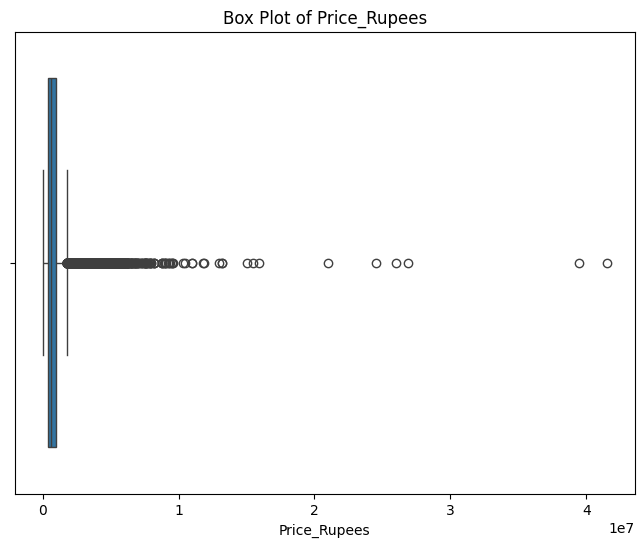

In [498]:
# Visualize with Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_encoded4['Price_Rupees'])
plt.title('Box Plot of Price_Rupees')
plt.show()


In [499]:
# Calculate IQR
Q1 = df_encoded4['Price_Rupees'].quantile(0.25)
Q3 = df_encoded4['Price_Rupees'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')

Lower Bound: -425000.0, Upper Bound: 1775000.0


In [ ]:
# Remove outliers
df_cleaned = df_encoded4[(df_encoded3['Price_Rupees'] >= lower_bound) & (df_encoded4['Price_Rupees'] <= upper_bound)]
print("Cleaned Data:")
print(df_cleaned)

## Exploratory Data Analysis (EDA)

In [501]:
# Descriptive Statistics:
print(df_cleaned.describe())

         Km_Driven  Transmission   Model_Year  Price_Rupees  Mileage_kmpl  \
count  7312.000000   7312.000000  7312.000000  7.312000e+03   7312.000000   
mean      0.006312      0.795268  2016.395788  6.346428e+05      0.127803   
std       0.594994      0.403533     3.776490  3.571981e+05      0.960183   
min      -0.796341      0.000000  1985.000000  2.800000e+04     -2.853583   
25%      -0.361606      1.000000  2014.000000  3.800000e+05     -0.440181   
50%      -0.053153      1.000000  2017.000000  5.600000e+05      0.014225   
75%       0.283914      1.000000  2019.000000  8.000000e+05      0.642821   
max      26.210336      1.000000  2023.000000  1.775000e+06     30.484686   

         Engine_cc  MaxPower_bhp  Ownership_Encoded  City_Encoded  
count  7312.000000   7312.000000        7312.000000   7312.000000  
mean     -0.205519     -0.234244           1.363649      2.463348  
std       0.780149      0.650835           0.636729      1.714397  
min      -2.983435     -1.728585  

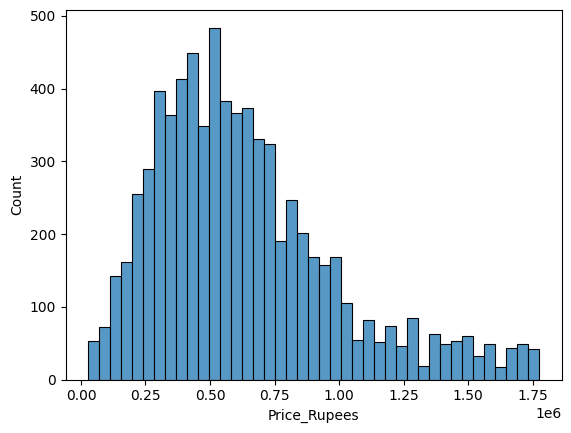

In [502]:
# Data Visualization: Use matplotlib and seaborn to create visualizations.
# Histograms for distribution:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df_cleaned['Price_Rupees'])
plt.show()

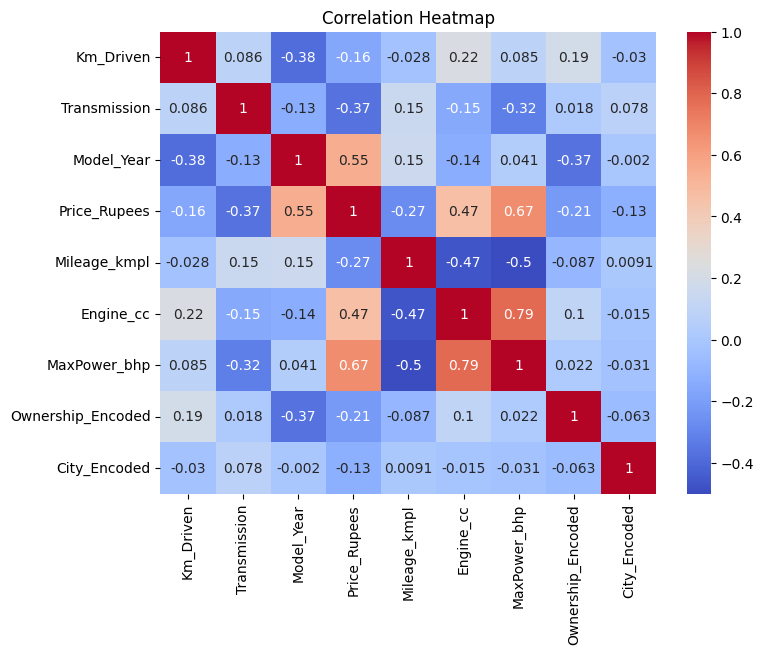

In [503]:
# Correlation Heatmap to see relationships between features:
# Select only numeric columns
df_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Step 2: Plot the correlation heatmap for numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [504]:
# Feature Selection: Find which features have a high correlation with Price_Rupees.
print(df_numeric.corr()['Price_Rupees'].sort_values(ascending=False))

Price_Rupees         1.000000
MaxPower_bhp         0.671165
Model_Year           0.546231
Engine_cc            0.466245
City_Encoded        -0.128354
Km_Driven           -0.161488
Ownership_Encoded   -0.214973
Mileage_kmpl        -0.273779
Transmission        -0.368658
Name: Price_Rupees, dtype: float64


In [ ]:
# Get the frequency of each car model
model_freq = df_cleaned['Model'].value_counts()

# Replace car models with their frequency
df_cleaned['Model_Encoded'] = df_cleaned['Model'].map(model_freq)

# Drop the original 'Model' column after encoding
df_final = df_cleaned.drop('Model', axis=1)

In [506]:
df_final.head()

,Km_Driven,Transmission,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Lpg,...,Body_Type_Hybrids,Body_Type_MUV,Body_Type_Minivans,Body_Type_Pickup Trucks,Body_Type_SUV,Body_Type_Sedan,Body_Type_Wagon,Ownership_Encoded,City_Encoded,Model_Encoded
0,0.824042,1,2015,400000.0,0.973527,-0.893437,-0.822276,False,False,False,...,False,False,False,False,False,False,False,3,0,152
1,-0.354706,1,2018,811000.0,-0.566405,0.151562,0.358928,False,False,False,...,False,False,False,False,True,False,False,2,0,167
2,-0.634992,1,2018,585000.0,1.160339,-0.472505,-0.453136,False,False,False,...,False,False,False,False,False,False,False,1,0,96
3,-0.556065,1,2014,462000.0,-0.036264,-0.476694,-0.499714,False,False,False,...,False,False,False,False,False,True,False,1,0,53
4,0.013850,1,2015,790000.0,1.112374,-0.369890,-0.355192,True,False,False,...,False,False,False,False,True,False,False,1,0,29


MODEL DEVELOPMENT IN CAR PRICE PREDICTION

In [507]:
# Assign variables X and y for training and target features
X = df_final.drop('Price_Rupees', axis=1)  # Features
y = df_final['Price_Rupees']  # Target

In [508]:
# Split dataset (80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [509]:
# LINEAR REGRESSION (Model-1)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [510]:
# Initialize the model
LR_model = LinearRegression()

# Train the model
LR_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = LR_model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 118126.9711936805
Mean Squared Error (MSE): 25817469185.201546
R-squared (R²): 0.7913209064171604


In [511]:
# Decision Tree Regressor  (Model-2)
from sklearn.tree import DecisionTreeRegressor

In [512]:
# Initialize the model
DT_model = DecisionTreeRegressor(random_state=42)

# Train the model
DT_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = DT_model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 91754.89291410345
Mean Squared Error (MSE): 21767094604.030304
R-squared (R²): 0.8240595335152134


In [513]:
# Hyperparameter Tuning with Grid Search:
# Key hyperparameters: max_depth, min_samples_split, min_samples_leaf

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=DT_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2}


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [514]:
# Predict using the best DT model
best_DT_model = grid_search.best_estimator_
y_pred = best_DT_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Decision Tree (Tuned) MSE: {mse}')
print(f'R-squared (R²): {r2}')

Decision Tree (Tuned) MSE: 18624859699.817497
R-squared (R²): 0.8494577910644601


In [515]:
# Random Forest Regressor (Model-3)
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
RF_model = RandomForestRegressor(random_state=42)

# Train the model
RF_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = RF_model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 70057.0832034632
Mean Squared Error (MSE): 11277480252.219784
R-squared (R²): 0.9088456602756191


In [516]:
# Hyperparameter Tuning with Random Search::
# Key hyperparameters: n_estimators, max_depth, min_samples_split, min_samples_leaf

from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Search
random_search = RandomizedSearchCV(estimator=RF_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit Random Search
random_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Hyperparameters: {random_search.best_params_}')

# Predict using the best model
best_RF_model = random_search.best_estimator_
y_pred = best_RF_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Random Forest (Tuned) MSE: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Random Forest (Tuned) MSE: 11247912540.41478
R-squared (R²): 0.9090846520704586


In [517]:
# Gradient Boosting Regressor (Model-4)

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
GB_model = GradientBoostingRegressor(random_state=42)

# Train the model
GB_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = GB_model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 80421.78516617625
Mean Squared Error (MSE): 12838451395.850132
R-squared (R²): 0.8962285427330342


In [518]:
# Hyperparameter Tuning with Grid Search:
# Key hyperparameters: n_estimators, learning_rate, max_depth

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=GB_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [519]:
# Best hyperparameters
print(f'Best Hyperparameters: {grid_search.best_params_}')

# Predict using the best model
best_GB_model = grid_search.best_estimator_
y_pred = best_GB_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Decision Tree (Tuned) MSE: {mse}')
print(f'R-squared (R²): {r2}')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Decision Tree (Tuned) MSE: 9088328515.793282
R-squared (R²): 0.9265402761496891


COMPARATIVE ANALYSIS WITH DIFFERENT ML MODELS

In [520]:
# Comparative Evaluation (All four models results)

# Store all models in a dictionary
models = {
    'Linear Regression': LR_model,
    'Decision Tree': DT_model,
    'Random Forest': RF_model,
    'Gradient Boosting': GB_model
}
# Dictionary to store evaluation results
Comparative_results = {}

In [521]:
# Loop through each model, make predictions, and calculate metrics
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results in the dictionary
    Comparative_results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

In [522]:
# Convert the results into a DataFrame for easy comparison
import pandas as pd
Results_df = pd.DataFrame(Comparative_results).T
print(Results_df)

                             MAE           MSE        R2
Linear Regression  118126.971194  2.581747e+10  0.791321
Decision Tree       91754.892914  2.176709e+10  0.824060
Random Forest       70057.083203  1.127748e+10  0.908846
Gradient Boosting   80421.785166  1.283845e+10  0.896229


In [523]:
## Regularization    (Regularization is a technique to prevent overfitting by penalizing large coefficients)
## Lasso Regression (L1 regularization): Adds a penalty proportional to the absolute value of the magnitude of the coefficients
## Ridge Regression (L2 regularization): Adds a penalty proportional to the square of the magnitude of the coefficients.

In [524]:
## Lasso Regression (L1 Regularization)

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Initialize Lasso Regression
lasso = Lasso()

# Define a grid of hyperparameters to tune
params = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Use GridSearchCV to find the optimal alpha
lasso_cv = GridSearchCV(lasso, params, cv=5)
lasso_cv.fit(X_train, y_train)

# Output best alpha
print(f"Best alpha for Lasso: {lasso_cv.best_params_['alpha']}")

# Train the final model using the best alpha
lasso_best = Lasso(alpha=lasso_cv.best_params_['alpha'])
lasso_best.fit(X_train, y_train)

# Predict and evaluate
y_pred = lasso_best.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.337e+13, tolerance: 6.079e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.100e+13, tolerance: 5.944e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

Best alpha for Lasso: 0.1
25816712281.38253
0.7913270243678296


c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.851e+13, tolerance: 7.513e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\Rajan\Desktop\New folder\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.851e+13, tolerance: 7.513e+10
  model = cd_fast.enet_coordinate_descent(


In [525]:
# Ridge Regression (L2 Regularization)

from sklearn.linear_model import Ridge

# Initialize Ridge Regression
ridge = Ridge()

# Define a grid of hyperparameters to tune
params = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Use GridSearchCV to find the optimal alpha
ridge_cv = GridSearchCV(ridge, params, cv=5)
ridge_cv.fit(X_train, y_train)

# Output best alpha
print(f"Best alpha for Ridge: {ridge_cv.best_params_['alpha']}")

# Train the final model using the best alpha
ridge_best = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge_best.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge_best.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)


Best alpha for Ridge: 0.1
25825018676.32866
0.7912598849067205


In [526]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib
import pickle

In [527]:
# Prepare features and target variable
X = df_final.drop(columns=['Price_Rupees'])  # Features
y = df_final['Price_Rupees']  # Target


In [528]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [529]:
# Train the Random Forest Regressor model
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

# Save the model
joblib.dump(RF_model, 'RF_regressor_model.pkl')
print("Model trained and saved successfully!")

Model trained and saved successfully!


Make RF model to deploy with Streamlit

In [534]:
# Selected Dataframe for deployment
df_combined1.head()

,Fuel_Type,Body_Type,Km_Driven,Transmission,Ownership,Model,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,Petrol,Hatchback,120000,Manual,3,Maruti Celerio,2015,400000.0,23.10,998,67.04,Bangalore
1,Petrol,SUV,32706,Manual,2,Ford Ecosport,2018,811000.0,17.00,1497,121.31,Bangalore
2,Petrol,Hatchback,11949,Manual,1,Tata Tiago,2018,585000.0,23.84,1199,84.00,Bangalore
3,Petrol,Sedan,17794,Manual,1,Hyundai Xcent,2014,462000.0,19.10,1197,81.86,Bangalore
4,Diesel,SUV,60000,Manual,1,Maruti SX4 S Cross,2015,790000.0,23.65,1248,88.50,Bangalore


In [577]:
# Limit the input features 
df_combined2 = df_combined1.drop(columns = ["Body_Type", "Model", "Ownership"], axis = 1)

In [578]:
df_combined2.head()

,Fuel_Type,Km_Driven,Transmission,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,Petrol,120000,Manual,2015,400000.0,23.10,998,67.04,Bangalore
1,Petrol,32706,Manual,2018,811000.0,17.00,1497,121.31,Bangalore
2,Petrol,11949,Manual,2018,585000.0,23.84,1199,84.00,Bangalore
3,Petrol,17794,Manual,2014,462000.0,19.10,1197,81.86,Bangalore
4,Diesel,60000,Manual,2015,790000.0,23.65,1248,88.50,Bangalore


In [579]:
df_combined2.shape

(8369, 9)

In [580]:
df_combined2.isnull().sum()

Fuel_Type         0
Km_Driven         0
Transmission      0
Model_Year        0
Price_Rupees      0
Mileage_kmpl      0
Engine_cc         0
MaxPower_bhp    192
City              0
dtype: int64

In [581]:
# Remove rows with missing values in the 'MaxPower_bhp' column
df_combined2 = df_combined2.dropna(subset = ['MaxPower_bhp'])

In [582]:
df_combined2.isnull().sum()

Fuel_Type       0
Km_Driven       0
Transmission    0
Model_Year      0
Price_Rupees    0
Mileage_kmpl    0
Engine_cc       0
MaxPower_bhp    0
City            0
dtype: int64

In [583]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8177 entries, 0 to 8368
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fuel_Type     8177 non-null   object 
 1   Km_Driven     8177 non-null   int64  
 2   Transmission  8177 non-null   object 
 3   Model_Year    8177 non-null   int64  
 4   Price_Rupees  8177 non-null   float64
 5   Mileage_kmpl  8177 non-null   float64
 6   Engine_cc     8177 non-null   int64  
 7   MaxPower_bhp  8177 non-null   float64
 8   City          8177 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 638.8+ KB


In [584]:
# checking th distribution of categorical data
print(df_combined2.Fuel_Type.value_counts())
print(df_combined2.Transmission.value_counts())
print(df_combined2.City.value_counts())

Fuel_Type
Petrol      5460
Diesel      2582
Cng           96
Electric      27
Lpg           12
Name: count, dtype: int64
Transmission
Manual       5909
Automatic    2268
Name: count, dtype: int64
City
Delhi        1468
Hyderabad    1445
Bangalore    1427
Chennai      1388
Kolkata      1361
Jaipur       1088
Name: count, dtype: int64


Encoding the Categorical data

In [590]:
# Encode Fuel_Type column
df_combined2.replace({'Fuel_Type': {'Petrol':0, 'Diesel': 1, 'Cng': 2, 'Electric': 3, 'Lpg':4}}, inplace = True)

In [589]:
# Encode Transmission column
df_combined2.replace({'Transmission': {'Manual':0, 'Automatic': 1}}, inplace = True)

In [588]:
# Encode City column
df_combined2.replace({'City': {'Chennai':0, 'Jaipur': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Bangalore': 5}}, inplace = True)

C:\Users\Rajan\AppData\Local\Temp\ipykernel_18664\2731236764.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined2.replace({'City': {'Chennai':0, 'Jaipur': 1, 'Delhi': 2, 'Hyderabad': 3, 'Kolkata': 4, 'Bangalore': 5}}, inplace = True)


In [591]:
# normalization of numerical features Km_Driven, Price_Rupees, Mileage_kmpl, Engine_cc, MaxPower_bhp
# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_combined2[['Km_Driven', 'Mileage_kmpl', 'Engine_cc', 'MaxPower_bhp']] = scaler.fit_transform(df_combined2[['Km_Driven', 'Mileage_kmpl', 'Engine_cc', 'MaxPower_bhp']])

In [597]:
df_combined2.head()

,Fuel_Type,Km_Driven,Transmission,Model_Year,Price_Rupees,Mileage_kmpl,Engine_cc,MaxPower_bhp,City
0,0,0.829101,0,2015,400000.0,0.955837,-0.885790,-0.822276,5
1,0,-0.342416,0,2018,811000.0,-0.592294,0.173288,0.358928,5
2,0,-0.620983,0,2018,585000.0,1.143643,-0.459188,-0.453136,5
3,0,-0.542541,0,2014,462000.0,-0.059331,-0.463432,-0.499714,5
4,1,0.023879,0,2015,790000.0,1.095422,-0.355190,-0.355192,5


In [608]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

In [609]:
# Train Test Split
X = df_combined2.drop('Price_Rupees', axis=1)  # Features
y = df_combined2['Price_Rupees']  # Target

In [610]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [611]:
# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model to a .pkl file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)